<a href="https://colab.research.google.com/github/pritkudale/ML-for-Teachers/blob/main/Linear%20Regression/Linear_regression_using_stats_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps in Machine Learning Model Building
## 1. Problem statement
- Create a regression model for predicting the average Balance
- Which factors influence the Credit Card Balance?
- Evaluate the model’s performance using appropriate metrics to ensure accurate predictions.


## 2. Data Collection

In [91]:
!pip install ISLP #remove first hashtag if ISLP is not installed

In [92]:
from ISLP import load_data
df = load_data('Credit')

## 3. Data Processing



- Step 1: Import the necessary libraries


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Step 3: Explore the dataset

In [94]:
df.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         400 non-null    int64   
 1   Income     400 non-null    float64 
 2   Limit      400 non-null    int64   
 3   Rating     400 non-null    int64   
 4   Cards      400 non-null    int64   
 5   Age        400 non-null    int64   
 6   Education  400 non-null    int64   
 7   Gender     400 non-null    category
 8   Student    400 non-null    category
 9   Married    400 non-null    category
 10  Ethnicity  400 non-null    category
 11  Balance    400 non-null    int64   
dtypes: category(4), float64(1), int64(7)
memory usage: 27.2 KB


In [96]:
df.isna().sum()

,0
ID,0
Income,0
Limit,0
Rating,0
Cards,0
Age,0
Education,0
Gender,0
Student,0
Married,0


- Step 4: Statistical Analysis

In [97]:
df.describe()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


- Step 5: Check the outliers

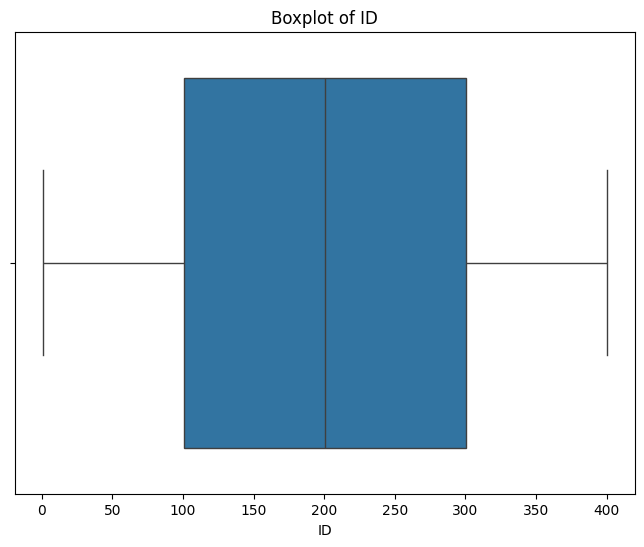

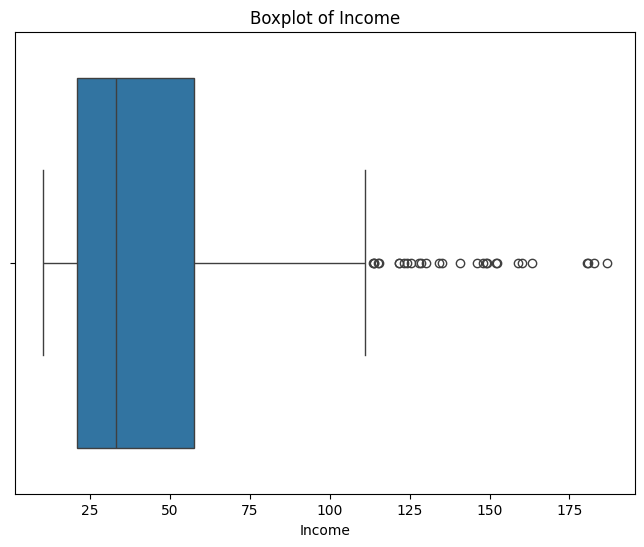

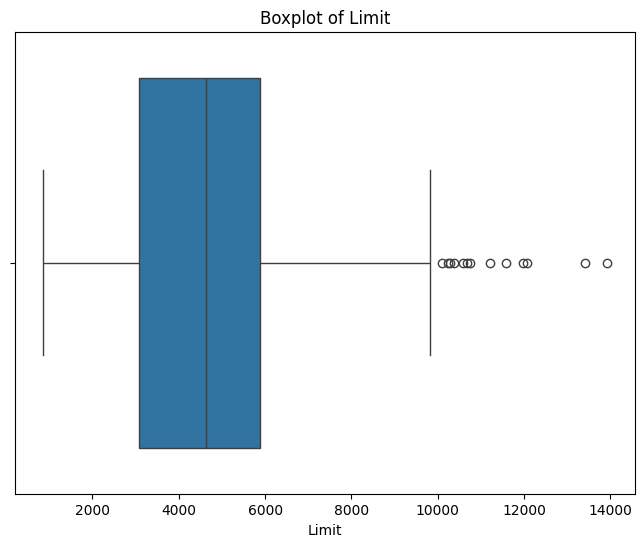

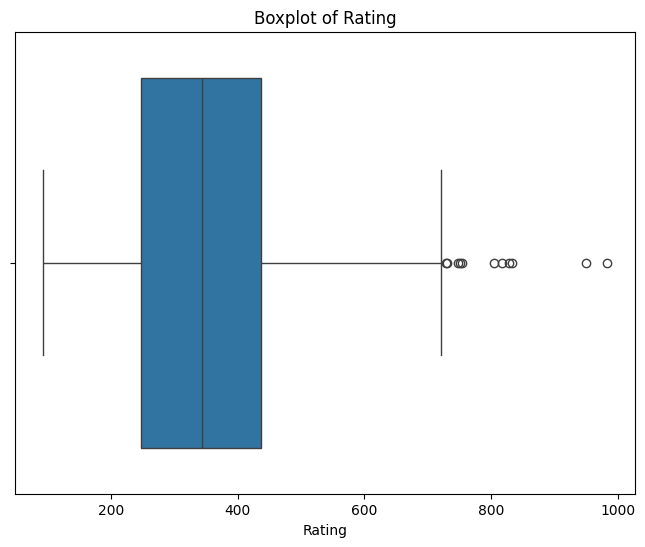

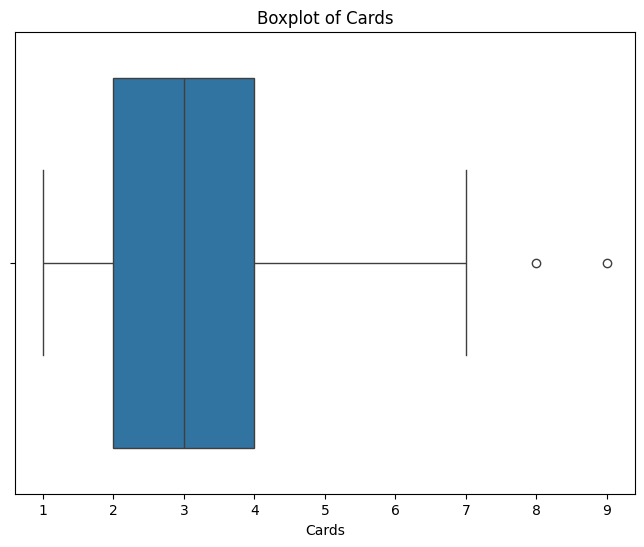

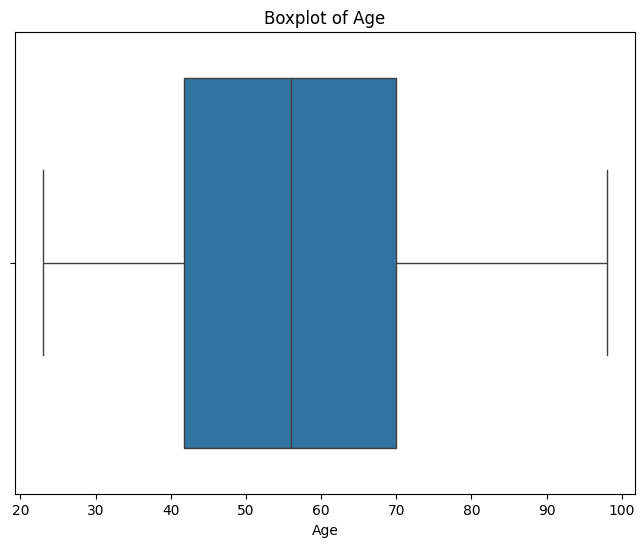

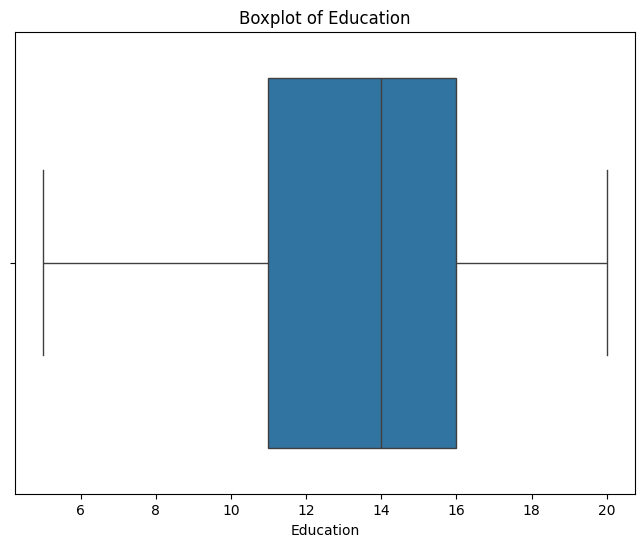

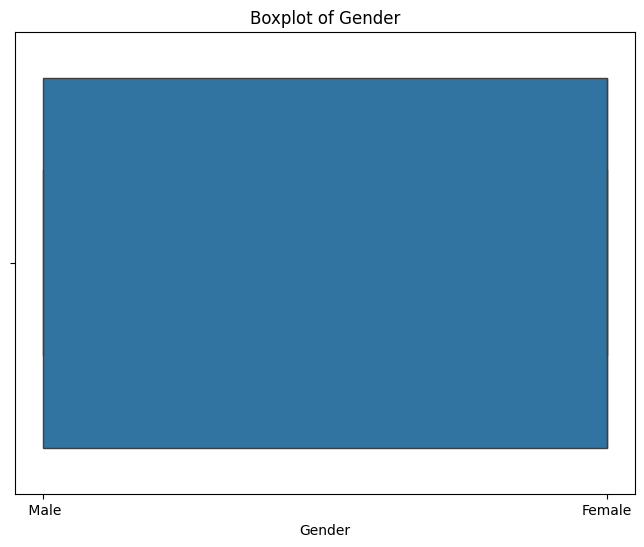

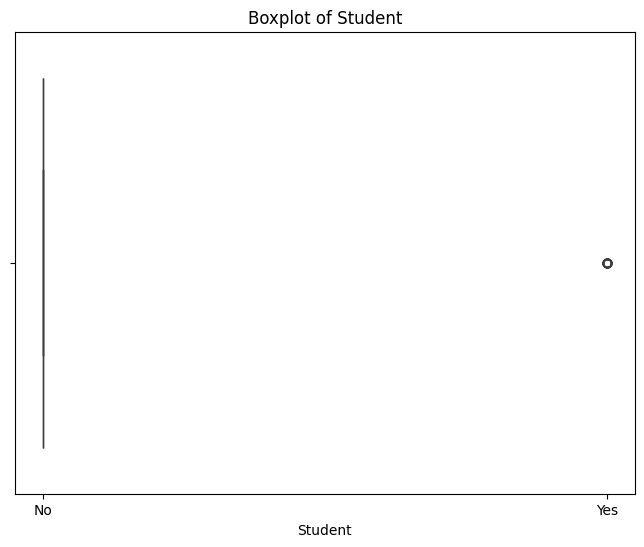

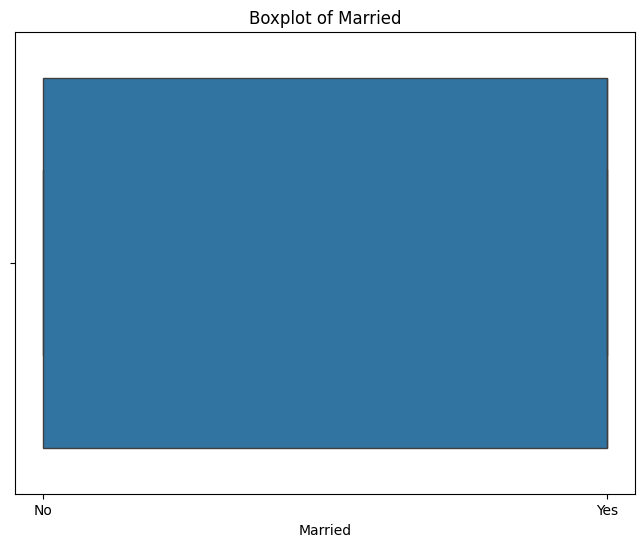

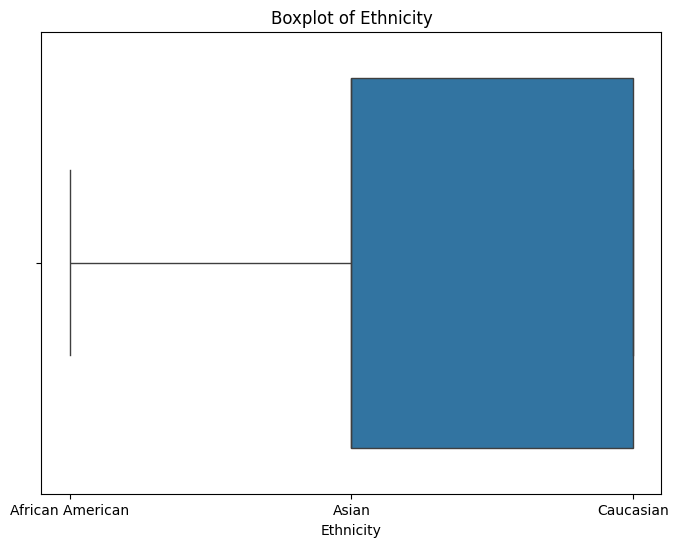

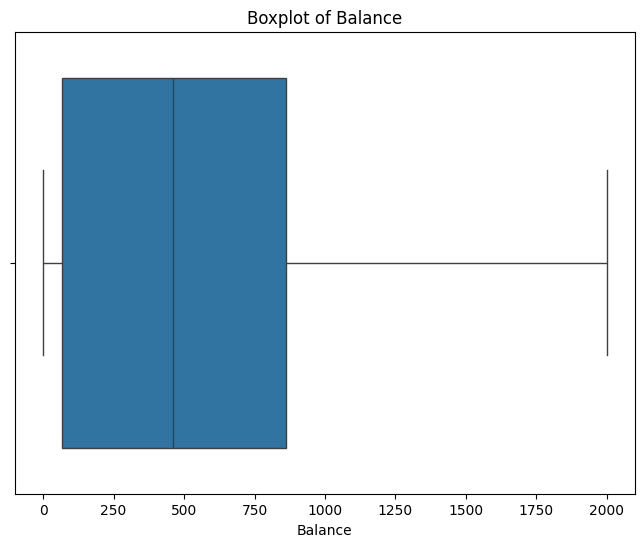

In [98]:
# prompt: create a boxplot for all colums

# Assuming 'df' is your DataFrame as defined in the previous code.

# Create boxplots for all columns
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [99]:
# prompt: clip the outliers for column Income, Limit, Rating upto 99 oercentile

def clip_outliers(df, columns, percentile=99):
    for col in columns:
        upper_limit = np.percentile(df[col], percentile)
        df[col] = np.clip(df[col], a_min=None, a_max=upper_limit)
    return df

columns_to_clip = ['Income', 'Limit', 'Rating']
df = clip_outliers(df, columns_to_clip)

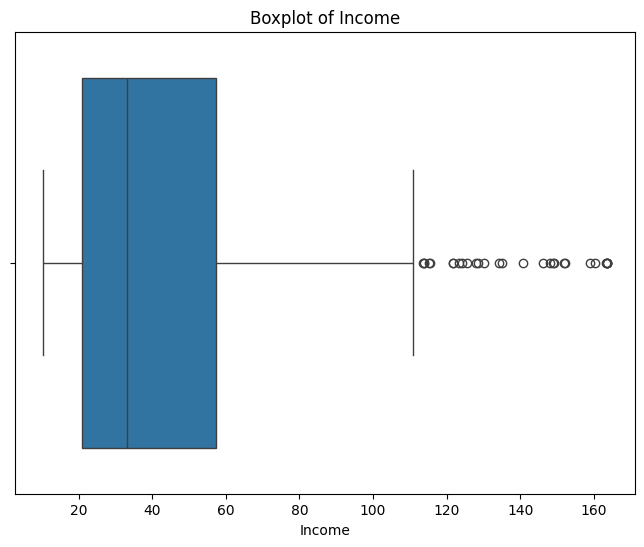

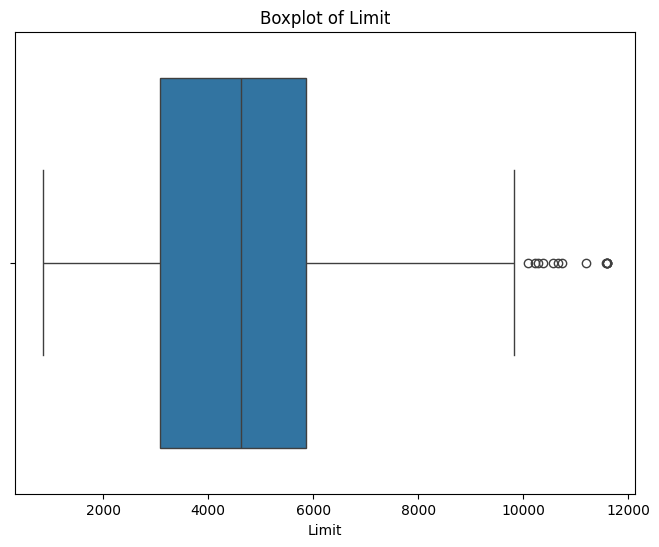

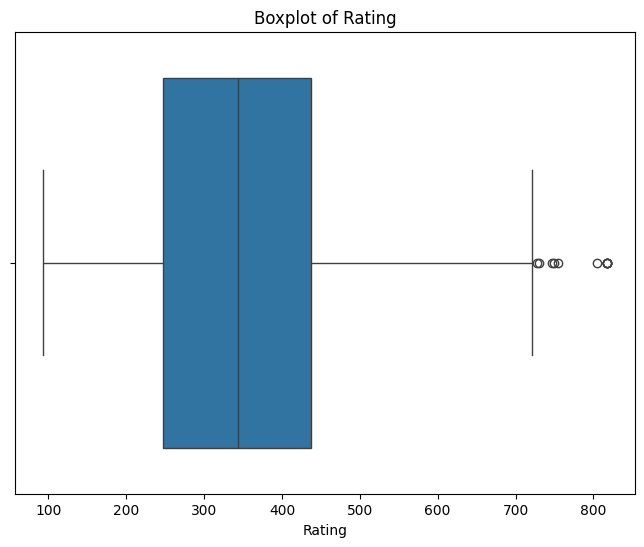

In [100]:
# prompt: print boxplot for column Income, Limit, Rating seperatly

# Assuming 'df' is your DataFrame as defined in the previous code.

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Limit'])
plt.title('Boxplot of Limit')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of Rating')
plt.show()

- Drop unnecessory column

In [101]:
# prompt: drop ID

df = df.drop(columns=['ID'])

In [102]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606.0,283.0,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645.0,483.0,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075.0,514.0,4,71,11,Male,No,No,Asian,580
3,148.924,9504.0,681.0,3,36,11,Female,No,No,Asian,964
4,55.882,4897.0,357.0,2,68,16,Male,No,Yes,Caucasian,331


In [103]:
df['Gender'][0]

' Male'

In [104]:
df['Ethnicity'].unique()

['Caucasian', 'Asian', 'African American']
Categories (3, object): ['African American', 'Asian', 'Caucasian']

- Step 6: Encoding

In [105]:
# prompt: encode the column Gender as Female as 0 and Male as 1, similarly do the same for Student, Married and Ethnicity

# Assuming 'df' is your DataFrame as defined in the previous code.

# Encoding categorical features
df['Gender'] = df['Gender'].map({'Female': 0, ' Male': 1})
df['Student'] = df['Student'].map({'No': 0, 'Yes': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Ethnicity'] = df['Ethnicity'].map({'Caucasian': 0, 'Asian': 1, 'African American': 2})

In [106]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606.0,283.0,2,34,11,1,0,1,0,333
1,106.025,6645.0,483.0,3,82,15,0,1,1,1,903
2,104.593,7075.0,514.0,4,71,11,1,0,0,1,580
3,148.924,9504.0,681.0,3,36,11,0,0,0,1,964
4,55.882,4897.0,357.0,2,68,16,1,0,1,0,331


- Step 7: Correlation

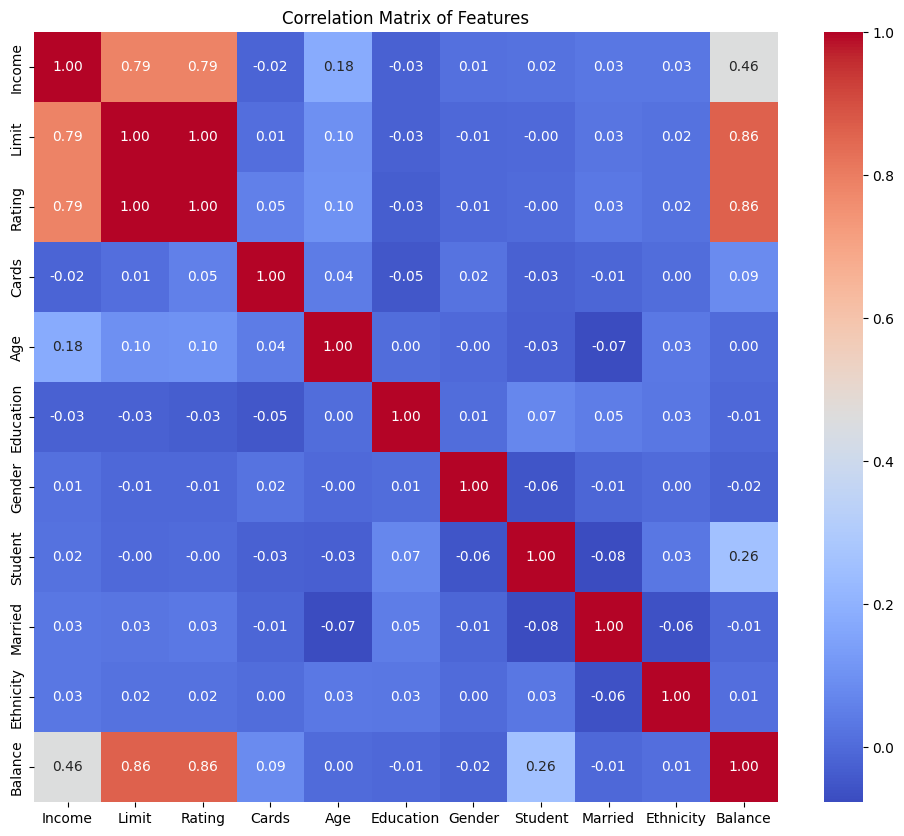

In [107]:
# prompt: plot correlation

# Assuming 'df' is your DataFrame as defined in the previous code.

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

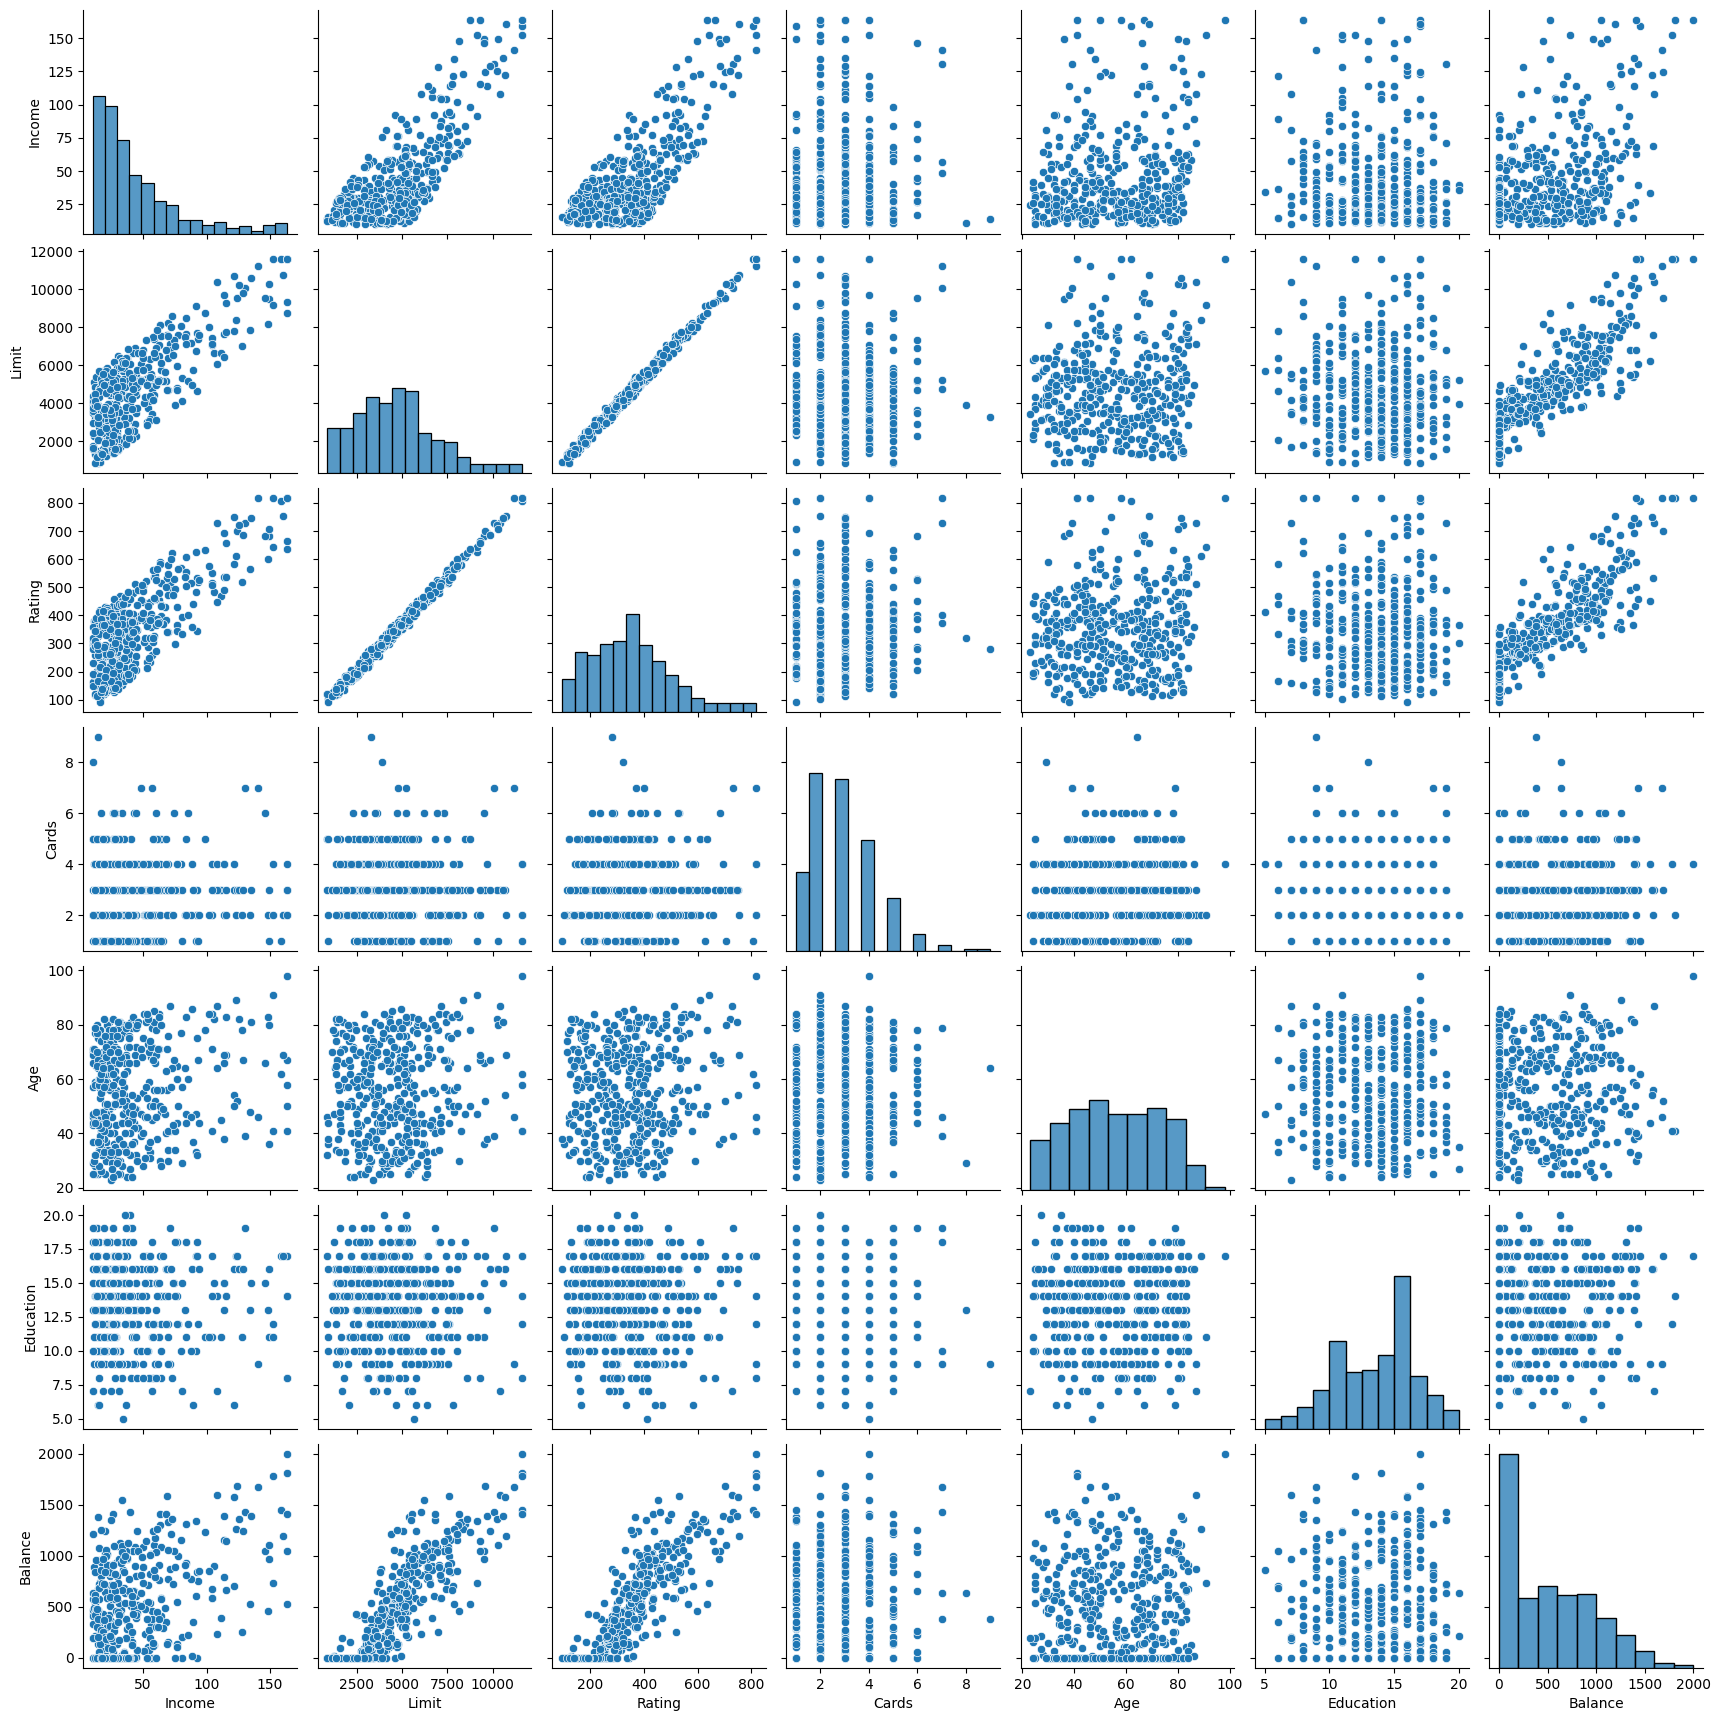

In [108]:
# prompt: plot pairplot

# Assuming 'df' is your DataFrame as defined in the previous code.

# Create a pairplot
sns.pairplot(df)
plt.show()

- Step 8: Separate independent features and Target Variables

In [109]:
# prompt: consider the Balance as target variable

# Assuming 'df' is your DataFrame as defined in the previous code.

# Separate features (X) and target variable (y)
X = df.drop(columns=['Balance'])
y = df['Balance']

In [110]:
X.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,14.891,3606.0,283.0,2,34,11,1,0,1,0
1,106.025,6645.0,483.0,3,82,15,0,1,1,1
2,104.593,7075.0,514.0,4,71,11,1,0,0,1
3,148.924,9504.0,681.0,3,36,11,0,0,0,1
4,55.882,4897.0,357.0,2,68,16,1,0,1,0


In [111]:
# prompt: calculate VIF score using stats model

# Assuming 'X' is your DataFrame of independent variables as defined in the previous code.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Income,7.143512
1,Limit,1076.836594
2,Rating,1272.382245
3,Cards,8.233998
4,Age,9.663959
5,Education,11.751057
6,Gender,1.902634
7,Student,1.141451
8,Married,2.606722
9,Ethnicity,1.817527


In [112]:
# prompt: drop Rating column from X

# Assuming 'X' is your DataFrame of independent variables as defined in the previous code.

X = X.drop(columns=['Rating'])
X.head()

,Income,Limit,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,14.891,3606.0,2,34,11,1,0,1,0
1,106.025,6645.0,3,82,15,0,1,1,1
2,104.593,7075.0,4,71,11,1,0,0,1
3,148.924,9504.0,3,36,11,0,0,0,1
4,55.882,4897.0,2,68,16,1,0,1,0


In [113]:
# prompt: calculate VIF score using stats model

# Assuming 'X' is your DataFrame of independent variables as defined in the previous code.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Income,7.143391
1,Limit,12.915686
2,Cards,5.073761
3,Age,9.247604
4,Education,11.185348
5,Gender,1.898164
6,Student,1.129469
7,Married,2.524765
8,Ethnicity,1.814458


## Data splitting

In [114]:
# prompt: split data in training and testing

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(320, 9) (80, 9) (320,) (80,)


- Step 9: Normalization or Standardization

In [115]:
# prompt: create a standard scaler

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
# prompt: use OLS model for linear regression

import statsmodels.api as sm

# Add a constant to the independent variables
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Create and fit the OLS model
model = sm.OLS(y_train, X_train_scaled).fit()

# Print the model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     617.3
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          4.10e-192
Time:                        11:49:09   Log-Likelihood:                -1953.1
No. Observations:                 320   AIC:                             3926.
Df Residuals:                     310   BIC:                             3964.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        518.8250      6.149     84.374      0.0

In [117]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [118]:
# prompt: create a r2 score for testing

from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9452529693986702


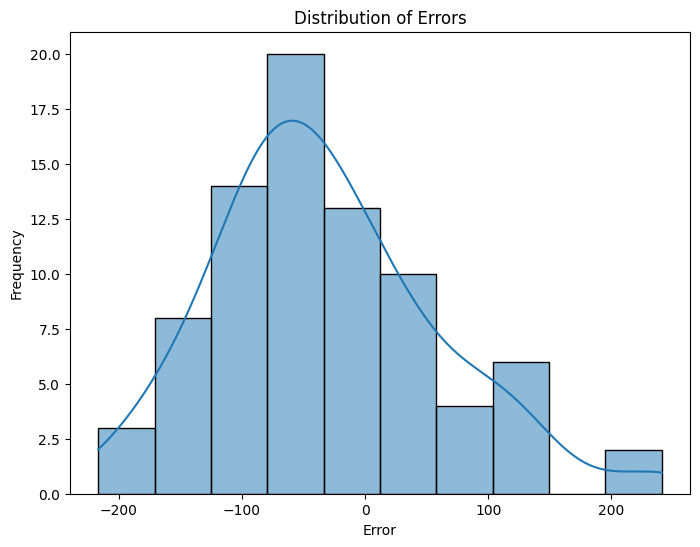

In [123]:
# prompt: plot distribution for error

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_test' and 'y_pred' are defined from your previous code
error = y_test - y_pred

# Plot the distribution of errors
plt.figure(figsize=(8, 6))
sns.histplot(error, kde=True)
plt.title('Distribution of Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

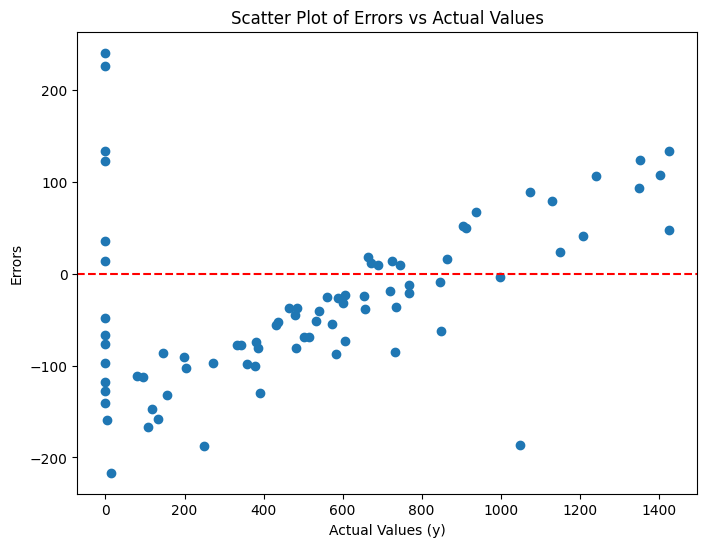

In [124]:
# prompt: plot scatter plot for error vs y

# Assuming 'y_test' and 'y_pred' are defined from your previous code
error = y_test - y_pred

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, error)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Actual Values (y)")
plt.ylabel("Errors")
plt.title("Scatter Plot of Errors vs Actual Values")
plt.show()